In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("GBcomments.csv",error_bad_lines=False)
df.head()

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


In [3]:
from textblob import TextBlob
TextBlob("It's more accurate to call it the M+ (1000) be...	").sentiment.polarity

0.45000000000000007

In [4]:
df.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [7]:
polarity=[]
for i in df.comment_text:
    polarity.append(TextBlob(i).sentiment.polarity)

## Polarity of positive comments 

In [8]:
df['polarity']=polarity
df.head(10)

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.450000
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.000000
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.000000
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.000000
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.000000
5,jt2OHQh0HoQ,Keep calm and buy iphone 8 Keep calm and buy i...,0,0,0.300000
6,jt2OHQh0HoQ,i am a big fan of youtube and u !!!!!!!!!!!!!,0,0,0.000000
7,jt2OHQh0HoQ,You will never find Losers who line up and pay...,0,0,-0.100000
8,jt2OHQh0HoQ,*APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...,0,0,0.028571
9,jt2OHQh0HoQ,"I'm only here to see Emma, I love her so much!...",0,0,0.500000


In [14]:
c_p=df[df['polarity']==1]
c_p.shape

(20400, 5)

In [15]:
c_p.head()

,video_id,comment_text,likes,replies,polarity
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.0
26,jt2OHQh0HoQ,The best thing to ever happen to iPhone,0,2,1.0
80,jt2OHQh0HoQ,Apple is always awesome \n\nhttps://youtu.be/r...,0,1,1.0
158,YPVcg45W0z4,das a lot of edditing you have done there ... ...,0,0,1.0
175,YPVcg45W0z4,Welcome to the Scandiworld!,0,0,1.0


In [16]:
from wordcloud import WordCloud,STOPWORDS
stopwords=set(STOPWORDS)

In [17]:
total_comments=''.join(c_p['comment_text'])

In [18]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

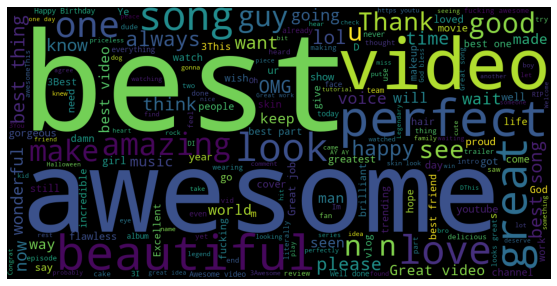

In [19]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

## Polarity of Negative Comments

In [21]:
c_n=df[df['polarity']==-1]
c_n.shape

(3339, 5)

In [22]:
total_comments=''.join(c_n['comment_text'])

In [23]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

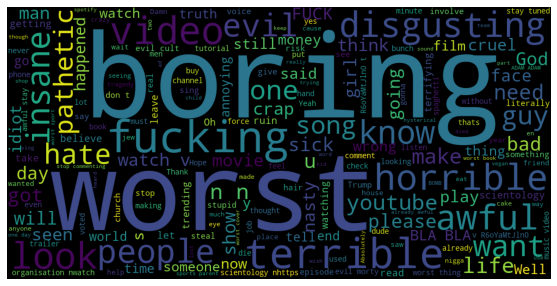

In [24]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')